# Exploratory Data Analysis Workshop

June 24, 2020  

### Welcome/Purpose of Workshop

- improve skills
- join our project team

### About Data Circles -- https://datacircles.org

Presenters Niwako and Erin are members of the Data Circles Project Circle.  
The Projects Circle is facilitating the Traffic Collision Analysis project described below.   

**NOTE: The bullet points in the cell below are helpful, but maybe select a few that seem more important? It feels a little too much information as an introduction**

## 1. Introduction to the project

Traffic collisions continue to be a serious problem. According to the [Washington State Dept. of Transportation (WSDOT)](https://www.wsdot.wa.gov/mapsdata/crash/pdf/2015_Annual_Collision_Summary.pdf), in 2015, Washington had:  

• 5,576,586 Licensed Drivers  
• 6,252,554 Registered Vehicles  
• 59.7 billion Vehicle Miles traveled  
• 416,699 Speeding citations filed with Washington State Courts  
• 33,697 Cell phone and texting citations filed with Washington State Courts  
• 26,363 DUI cases filed with Washington State Courts  
• 117,053 Total collisions  
• Fridays had the most collisions 
• Rush hour had the most collisions, with the highest number during 5:00 p.m. - 5:59 p.m.  
• December had the most crashes (on average, 401 per day)  
• Driver inattention or distraction was the most frequent contributing factor  

So, by analyzing crash data we hope to identify the most dangerous sections of road in Seattle and suggest improvements.  

If you are interested in joining the project team, please signup for the project kickoff on [meetup.com](https://www.meetup.com/Seattle-WiDS-Meetup/events/ncnksrybckblb/).  

## 2. Purpose of exploratory data analysis

Data exploration is the first step in the data analysis process, and involves looking for patterns, characteristics, or points of interest in a large set of unstructured data. Summarizing the size, accuracy and initial patterns in the data provides insight into potential trends and identifies areas that require further analysis to refine the data.  

Data exploration typically uses both manual data analysis and automated tools that extract data into initial reports that include data visualizations and charts. Analysis typically includes: variable identification, data cleaning/reformatting, univariate analysis and bi-variate analysis. The end result provides a more useful view of the data to guide further analysis.  

## 3. Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore') 

from datetime import datetime
from IPython.display import display, Markdown

In [2]:
# Display all output within each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 4. Read the data into a dataframe

It's always a good idea to keep a copy of the original data. So, we suggest saving the original collision data in a CSV file and a second CSV file with the manipulated data.  

For more information about the Pandas `read_csv` method, see the [pandas.read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). There are many useful parameters that can be specified, e.g. data types, column names, null values, and etc.   

In [3]:
url = "https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
rdf = pd.read_csv(url, parse_dates=['INCDTTM'])
#display(rdf.head())

In [4]:
rdf = pd.read_csv('collision_data_692020.csv')

### OPTIONAL -- save the initial CSV file 

It's good practice to save a copy of the original data, but it is not necessary for this workshop. If you want to write a copy of the df to your hard drive, follow run the cells below:

In [5]:
# to see where the above file is being saved, you can run the
# print working directory shell command like this:

! pwd

/Users/niwako/GDrive/Kyōyū/garbanzo


In [6]:
df = rdf.copy()

In [7]:
# to save the CSV file data locally in your working directory:

now = datetime.now()
file_name = "collision_data_{}{}{}.csv".format(now.month, now.day, now.year)
df.to_csv(file_name, encoding="utf-8", index=False) 

In [8]:
# the ls command shows a list of all files in the current folder (aka directory)
# the collision_data CSV file should be in the list
! ls

Assessment-2019-07-23.ipynb collision_data_6122020.csv
NS_Workshop on EDA.ipynb    collision_data_692020.csv
Workshop on EDA.ipynb       crime_stats
collision_data_6102020.csv  temperament.ipynb
collision_data_6112020.csv


## 5. Look at the overall picture of the dataframe

In [9]:
df.shape

(219784, 40)

In [10]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

**NOTE: We might not need to talk about categories of columns here (cell below) as they will be looked at later.**

### About the columns

OBJECTID - ESRI unique identifier  
SHAPE - ESRI geometry field  
INCKEY - a unique key for the incident, type Long  
COLDETKEY - a secondary key for the incident, type Long  
ADDRTYPE - text, 12 VARCHAR, Collision address type:  
$\,\,$ • Alley  
$\,\,$ • Block  
$\,\,$ • Intersection   
INTKEY - a key that corresponds to the intersection associated with a collision, type Double  
SEVERITYCODE - a code that corresponds to the severity of the collision:  
$\,\,$ • 3 — fatality  
$\,\,$ • 2b — serious injury  
$\,\,$ • 2 — injury  
$\,\,$ • 1 — prop damage  
$\,\,$ • 0 — unknown  
INCDATE - incident date   
INCDTTM - date and time of the incident, type Text, 30 VARCHAR  
JUNCTIONTYPE - category of the junction where the collision took place  
SDOT_COLCODE - the SDOT collision code    
SDOT_COLDESC - a description of the collision corresponding to the collision code  
INATTENTIONIND - whether or not collision was due to inattention. (Y/N)  
PEDROWNOTGRNT - whether or not the pedestrian right of way was not granted. (Y/N)  
ST_COLCODE - code provided by the state that describes the collision, for example: 
$\,\,$ 0 - Vehicle Going Straight Hits Pedestrian  
$\,\,$ 1 - Vehicle Turning Right Hits Pedestrian  
$\,\,$ 2 - Vehicle Turning Left Hits Pedestrian  
$\,\,$ 3 - Vehicle Backing Hits Pedestrian  
$\,\,$ 4 - Vehicle Hits Pedestrian - All Other Actions  
$\,\,$ 5 - Vehicle Hits Pedestrian - Actions Not Stated  
$\,\,$ 10 - Entering At Angle   
$\,\,$ 11 - From Same Direction - Both Going Straight - Both Moving - Sideswipe  
$\,\,$ 12 - From Same Direction - Both Going Straight - One Stopped - Sideswipe  
$\,\,$ 13 - From Same Direction - Both Going Straight - Both Moving - Rear End  
$\,\,$ ...  
ST_COLDESC - a description that corresponds to the state’s coding designation    
SEGLANEKEY - a key for the lane segment in which the collision occurred  
CROSSWALKKEY - a key for the crosswalk at which the collision occurred  

In [11]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

## 6. Understand the dataframe in relation to the questions at hand

## a. Goals

The Project Circle has the following goals

1. Identify dangerous locations 
1. Identify predictors of accidents (e.g., physical characteristics of the location, road condition, DUI, weather)
1. Examine increase or decrease in number of accidents over time
1. Identify predictors of increase or decrease in the number of accidents
1. Recommend improvements on dangerous locations

- However, as you explore the dataset, other questions are likely to pop up in your head. 
- We recommend making a note of those questions as they may guide you through your project. 
- You are welcome to answer any questions you are interested in using this dataset.

## b. Which columns are related to the outcome of the incident?

- PERSONCOUNT (# of people invovled)
- PEDCOUNT (# of pedestirans)
- PEDCYLCOUNT (# of cyclists)
- VEHCOUNT (# of vehicles)
- INJURIES (# of injuries)
- SERIOUSINJURIES (# of serious injuries)
- FATALITIES (#  of deaths)

## c. Which columns might serve as predictors of the outcome of the incident?

### External (i.e., not dependent on the characteristics of the collision site) factors
- LIGHTCOND (light condition)   
- WEATHER   

### People’s factors
- INATTENTIONIND (whether or not collision was due to inattention)
- UNDERINFL (whether or not a driver involved was under the influence)
- PEDROWNOTGRNT(Whether pedestrian had the right of way)
- SPEEDING (whether or not speeding was a factor in the collision)

### Characteristics of the site
- ADDRTYPE (address type)
- LOCATION (described in street names)
- JUNCTIONTYPE (junction type)
- ROADCOND (road condition)


## 7. Cleaning at the dataframe level

It can be helpful to evaluate the dataframe as a whole and do dataframe level cleaning and formatting before drilling down into the individual variables. This includes tasks like renaming columns, removing duplicate rows, changing column datatypes, or dropping any clearly unnecessary columns (especially if memory is an issue).  

Depending on the complexity of your dataset and how familiar you are with the the domain knowledge, some of these tasks will need to be completed after you work with the individual variables, _i.e._ at the column level.  

This might also be a good point to merge multiple dataframes if you're working with multiple datasets.  

## a. Consider dropping unnecessary columns

It is a bit risky to drop columns at this point, but if there are columns that are clearly unhelpful or missing a huge amount of data, then dropping those columns is reasonable. 

In [12]:
# example - column objectid is essentially an index column, so you could drop it,
# but this might make things a bit difficult later if you want to merge on objectid
df.drop(columns=["OBJECTID"], inplace=False).head(3)

,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.351724,47.560306,69200,69200,2609209,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,NaN,NaN,2,Injury Collision,Other,1,0,0,1,1,0,0,2007/11/21 00:00:00+00,2007-11-21 21:58:00,Mid-Block (not related to intersection),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,0,Clear,Dry,Dark - Street Lights On,NaN,7325037.0,NaN,50,Fixed object,0,0,N
1,-122.347730,47.728225,330812,332312,EA29622,Unmatched,Block,NaN,LINDEN AVE N BETWEEN N 137TH S ST AND N 137TH ...,,NaN,1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/04/17 00:00:00+00,2020-04-17 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
2,-122.336316,47.651240,64400,64400,2611290,Matched,Block,NaN,WALLINGFORD AVE N BETWEEN N 36TH ST AND N 37TH ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2007/04/08 00:00:00+00,2007-04-08 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Unknown,Unknown,Dark - Street Lights On,NaN,7098008.0,NaN,32,One parked--one moving,0,0,N


In [13]:
# or make objectid the df index
df.set_index("OBJECTID", inplace=False).head(3)

,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-122.351724,47.560306,69200,69200,2609209,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,NaN,NaN,2,Injury Collision,Other,1,0,0,1,1,0,0,2007/11/21 00:00:00+00,2007-11-21 21:58:00,Mid-Block (not related to intersection),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,0,Clear,Dry,Dark - Street Lights On,NaN,7325037.0,NaN,50,Fixed object,0,0,N
2,-122.347730,47.728225,330812,332312,EA29622,Unmatched,Block,NaN,LINDEN AVE N BETWEEN N 137TH S ST AND N 137TH ...,,NaN,1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/04/17 00:00:00+00,2020-04-17 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
3,-122.336316,47.651240,64400,64400,2611290,Matched,Block,NaN,WALLINGFORD AVE N BETWEEN N 36TH ST AND N 37TH ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2007/04/08 00:00:00+00,2007-04-08 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Unknown,Unknown,Dark - Street Lights On,NaN,7098008.0,NaN,32,One parked--one moving,0,0,N


In [14]:
# consider how many missing values there are in each column

col_na = round(100*(df.isna().sum()/len(df)), 2)
col_nunique = df.nunique()    
display(pd.DataFrame({"percent_missing_values": col_na,
                      "total_unique_values": col_nunique}).sort_values(by=["percent_missing_values"],
                                                                ascending=False).head(25))

,percent_missing_values,total_unique_values
PEDROWNOTGRNT,97.65,1
SPEEDING,95.53,1
EXCEPTRSNDESC,94.66,1
INATTENTIONIND,86.27,1
INTKEY,67.57,7889
EXCEPTRSNCODE,54.78,2
SDOTCOLNUM,42.12,127186
LIGHTCOND,12.00,9
WEATHER,11.96,11
ROADCOND,11.93,9


## b. Consider renaming columns

If you want to use new naming conventions for variables, it is better to make the change earlier. For example, it often makes sense to change all the column names to lowercase or add underscores between words. 

In [15]:
# probably don't want to run this cell because subsequent cells use capitalized column names,
# but this is an example showing how to make all column names lowercase

df.columns = map(str.lower, df.columns)
df.head(2)

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar
0,-122.351724,47.560306,1,69200,69200,2609209,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,NaN,NaN,2,Injury Collision,Other,1,0,0,1,1,0,0,2007/11/21 00:00:00+00,2007-11-21 21:58:00,Mid-Block (not related to intersection),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,0,Clear,Dry,Dark - Street Lights On,NaN,7325037.0,NaN,50,Fixed object,0,0,N
1,-122.347730,47.728225,2,330812,332312,EA29622,Unmatched,Block,NaN,LINDEN AVE N BETWEEN N 137TH S ST AND N 137TH ...,,NaN,1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/04/17 00:00:00+00,2020-04-17 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


## c. Consider dropping duplicate or unnecessary rows 

It seems that none of the rows in this dataset has complete data. So we would end up with now row if we dropped any row with missing values. We could take a closer look and decide to drop rows depending on which columns they are missing values in (e.g., even if `X` and `Y` are missing, as long as the `LOCATION` column is not missing, we still know where the accident happened, so it's okay to keep a row that are missing `X` and `Y`).  

This section includes two examples. The first example shows a way to look at combinations of variables to determine if there are duplicates. The second considers dropping rows based on insufficient data, i.e. it might make sense to drop all the 2003 data because there are very few data values from 2003 and that may skew the distribution.  

In [16]:
dup_col_lst = []

# make all string column values lowercase for uniform comparison
str_cols = list(df.select_dtypes(include="object").columns)
for col in str_cols:
    df[col] = df[col].str.lower()
# print("str_cols: {}\n\n".format(str_cols))

for col in df.columns:
    # if the total number of unique values = total number of rows in df
    if df[col].nunique() == df.shape[0]:
        print("column {} has no duplicate rows".format(col))
    else:
        dup_col_lst.append(col)
        
print("\n {} columns have duplicate values:\n{}".format(len(dup_col_lst), dup_col_lst))

column objectid has no duplicate rows
column inckey has no duplicate rows
column coldetkey has no duplicate rows

 37 columns have duplicate values:
['x', 'y', 'reportno', 'status', 'addrtype', 'intkey', 'location', 'exceptrsncode', 'exceptrsndesc', 'severitycode', 'severitydesc', 'collisiontype', 'personcount', 'pedcount', 'pedcylcount', 'vehcount', 'injuries', 'seriousinjuries', 'fatalities', 'incdate', 'incdttm', 'junctiontype', 'sdot_colcode', 'sdot_coldesc', 'inattentionind', 'underinfl', 'weather', 'roadcond', 'lightcond', 'pedrownotgrnt', 'sdotcolnum', 'speeding', 'st_colcode', 'st_coldesc', 'seglanekey', 'crosswalkkey', 'hitparkedcar']


In [17]:
# example to drop duplicate rows (although no duplicate rows in this example)

df.drop_duplicates(subset=["objectid", "incdate"], keep="first", inplace=True)

In [18]:
# looking at incidents over time to see the annual distribution of the data

df["incdate"] = df["incdate"].astype("datetime64")
df["year"] = pd.DatetimeIndex(df.incdate).year  # alternate method
df["month"] = df["incdate"].map(lambda x: x.strftime('%m'))
round(100*(df[["year",
               "objectid"]].groupby(by=["year"]).count()/len(df)),
      3).rename(columns={"objectid": "percent_of_all_data"})

,percent_of_all_data
year,
2003,0.000
2004,7.033
2005,7.287
2006,7.186
2007,6.862
2008,6.433
2009,6.040
2010,5.441
2011,5.649


In [19]:
# remove 2003 data
df = df[df["year"] != 2003]
print("df shape with year and month columns, but without the 2003 data: {}".format(df.shape))

df shape with year and month columns, but without the 2003 data: (219783, 42)


## d. Consider changing variable data types

Think about how you plan to use the variable before you change its data type. Pandas data types include: "bool", "float64", "int", "object", "category", and etc. Because we did not assign variable types to columns, all our columns   

In Pandas, `categorical variables` require less memory, so (if appropriate) it can be very useful to change numeric or string (aka Object) variables to categorical variables. However, there are additional considerations. For example, a column with null (NaN) values cannot be converted into a categorical variable. Also, categorical variables cannot be summed like numerical variables, so running univariate statistics on categorical variables requires an additional step.   

In [20]:
# look at how much memory each column variable requires
df.memory_usage()

Index              1758264
x                  1758264
y                  1758264
objectid           1758264
inckey             1758264
coldetkey          1758264
reportno           1758264
status             1758264
addrtype           1758264
intkey             1758264
location           1758264
exceptrsncode      1758264
exceptrsndesc      1758264
severitycode       1758264
severitydesc       1758264
collisiontype      1758264
personcount        1758264
pedcount           1758264
pedcylcount        1758264
vehcount           1758264
injuries           1758264
seriousinjuries    1758264
fatalities         1758264
incdate            1758264
incdttm            1758264
junctiontype       1758264
sdot_colcode       1758264
sdot_coldesc       1758264
inattentionind     1758264
underinfl          1758264
weather            1758264
roadcond           1758264
lightcond          1758264
pedrownotgrnt      1758264
sdotcolnum         1758264
speeding           1758264
st_colcode         1758264
s

In [21]:
# example - one way to filter the original variable data types

df.select_dtypes(exclude=["int"]).head(3)

,x,y,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,hitparkedcar,month
0,-122.351724,47.560306,2609209,matched,block,NaN,west marginal way sw between sw alaska st and ...,NaN,NaN,2,injury collision,other,2007-11-21,2007-11-21 21:58:00,mid-block (not related to intersection),28.0,motor vehicle ran off road - hit fixed object,NaN,0,clear,dry,dark - street lights on,NaN,7325037.0,NaN,50,fixed object,n,11
1,-122.347730,47.728225,ea29622,unmatched,block,NaN,linden ave n between n 137th s st and n 137th ...,,NaN,1,property damage only collision,NaN,2020-04-17,2020-04-17 00:00:00,mid-block (not related to intersection),11.0,"motor vehicle struck motor vehicle, front end ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,n,04
2,-122.336316,47.651240,2611290,matched,block,NaN,wallingford ave n between n 36th st and n 37th st,NaN,NaN,1,property damage only collision,parked car,2007-04-08,2007-04-08 00:00:00,mid-block (not related to intersection),11.0,"motor vehicle struck motor vehicle, front end ...",NaN,0,unknown,unknown,dark - street lights on,NaN,7098008.0,NaN,32,one parked--one moving,n,04


In [22]:
# example - to check to see if the column is really a float or should be an int
pd.Series(df["sdotcolnum"].unique()).sort_values(ascending=True)[0:30]

89564    1007024.0
2264     3021048.0
368      3137016.0
224      3239035.0
8033     4001001.0
10823    4001002.0
9710     4001003.0
1810     4001004.0
1411     4001005.0
9761     4001006.0
16258    4001007.0
8193     4001008.0
12252    4001009.0
6289     4001010.0
10637    4001011.0
7722     4001012.0
15445    4001013.0
3659     4001014.0
10483    4001015.0
7661     4001016.0
16407    4001017.0
3616     4001018.0
8849     4001019.0
2412     4001020.0
2282     4001021.0
15813    4001022.0
9138     4001023.0
6523     4001024.0
16187    4001025.0
8682     4001026.0
dtype: float64

In [23]:
# example - one way to clean up column data types

df_ = df.copy() 

for col in df_.columns:
    if col.lower() in ["status", "addrtype", "severitycode"]:
        df_.fillna({col: "none"}, inplace=True)
        df_[col] = pd.Series([str(word).lower() for word in df[col]])
        df_[col] = df[col].astype("category")
    elif col.lower() in ["sdot_colcode", "sdotcolnum"]:
        df_[col] = df[col].fillna(0).astype(int)
    elif col.lower() in ["x", "y"]:
        df_[col] = df[col].astype("float")
    elif col.lower() in ["incdttm"]:
        df_[col] = pd.to_datetime(arg=df[col])
    else:
        continue
        
df_.dtypes

x                         float64
y                         float64
objectid                    int64
inckey                      int64
coldetkey                   int64
reportno                   object
status                   category
addrtype                 category
intkey                    float64
location                   object
exceptrsncode              object
exceptrsndesc              object
severitycode             category
severitydesc               object
collisiontype              object
personcount                 int64
pedcount                    int64
pedcylcount                 int64
vehcount                    int64
injuries                    int64
seriousinjuries             int64
fatalities                  int64
incdate            datetime64[ns]
incdttm            datetime64[ns]
junctiontype               object
sdot_colcode                int64
sdot_coldesc               object
inattentionind             object
underinfl                  object
weather       

## 8. Understand individual columns

In this section, we will examine some of the columns by answering questions that align with the three of the goals mentioned above.

- Goal 1: Identify dangerous locations
- Goal 2: Identify predictors of accidents 
- Goal 3: examine increase or decrease in number of accidents over time

## Goal 1: Which locations are dangerous?

### Q1. How do we decide that a location is dangerous?

We could define dangerousness by:
- Severity of accidents
- Number of accidents

Let's take a look at the outcome columns to understand what these accidents look like.

In [24]:
outcome_columns = [
    'personcount',
    'pedcount',
    'pedcylcount',
    'vehcount',
    'injuries',
    'seriousinjuries',
    'fatalities']

In [25]:
df[outcome_columns].describe()

,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities
count,219783.000000,219783.000000,219783.000000,219783.000000,219783.000000,219783.000000,219783.000000
mean,2.227534,0.038133,0.027286,1.730452,0.373705,0.015151,0.001683
std,1.472154,0.201836,0.164334,0.829209,0.732484,0.158128,0.044610
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
max,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000


- There is no missing values for these columns
- There isn't a lot of variability in the values for these columns
- There seem to be some outliers (e.g., `personcount`, `injuries`)

Let's take a look at these columns with some visualization.

{'whiskers': [<matplotlib.lines.Line2D at 0x1396e4450>,
 'caps': [<matplotlib.lines.Line2D at 0x1396e4ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1396c9050>],
 'medians': [<matplotlib.lines.Line2D at 0x1396f39d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1396f3f10>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x1397a2190>,
 'caps': [<matplotlib.lines.Line2D at 0x1397a2c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x13979bbd0>],
 'medians': [<matplotlib.lines.Line2D at 0x139793d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1397ac7d0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x139848410>,
 'caps': [<matplotlib.lines.Line2D at 0x139848e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x13983ee50>],
 'medians': [<matplotlib.lines.Line2D at 0x139851990>],
 'fliers': [<matplotlib.lines.Line2D at 0x139851ed0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x13991ed10>,
 'caps': [<matplotlib.lines.Line2D at 0x139928810>,
 'boxes': [<matplotlib.lines.Line2D at 0x13991e790>],
 'medians': [<matplotlib.lines.Line2D at 0x139930310>],
 'fliers': [<matplotlib.lines.Line2D at 0x139930850>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x1399f9b10>,
 'caps': [<matplotlib.lines.Line2D at 0x1399fe5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1399f9450>],
 'medians': [<matplotlib.lines.Line2D at 0x1399fe990>],
 'fliers': [<matplotlib.lines.Line2D at 0x139a08190>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x139708e50>,
 'caps': [<matplotlib.lines.Line2D at 0x139aada10>,
 'boxes': [<matplotlib.lines.Line2D at 0x139a94850>],
 'medians': [<matplotlib.lines.Line2D at 0x139ab7510>],
 'fliers': [<matplotlib.lines.Line2D at 0x139ab7a50>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x139b5f710>,
 'caps': [<matplotlib.lines.Line2D at 0x139b631d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x139b5f190>],
 'medians': [<matplotlib.lines.Line2D at 0x139b63c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x139b6d210>],
 'means': []}

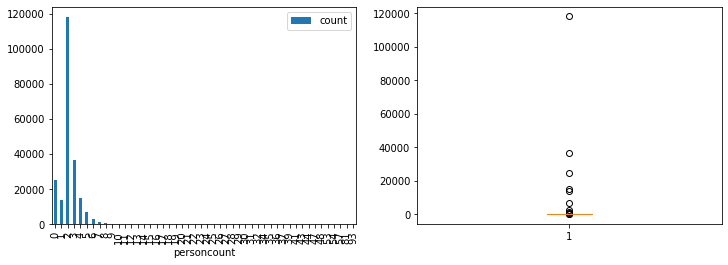

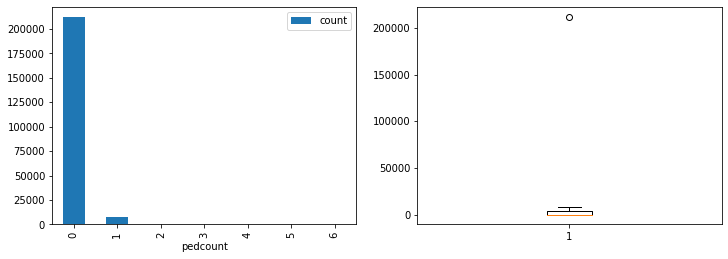

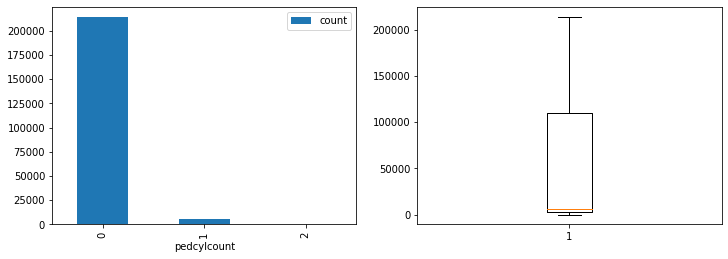

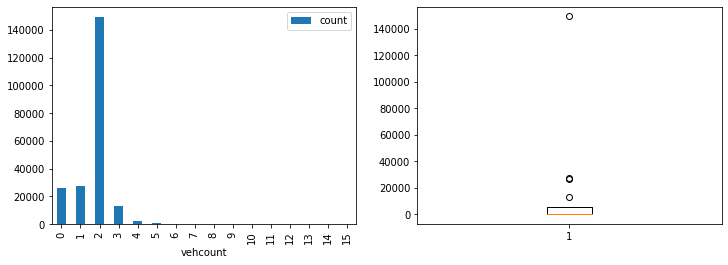

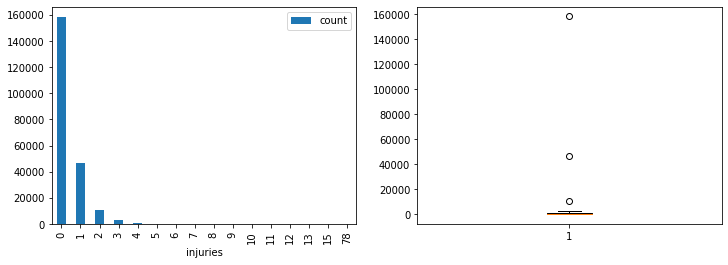

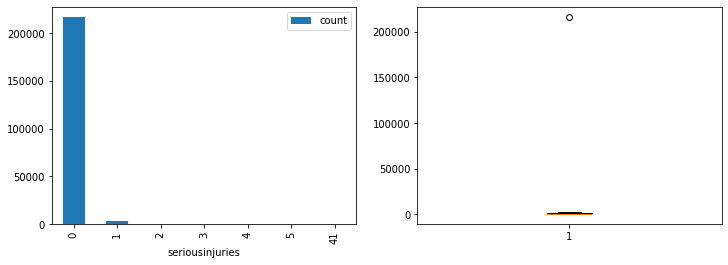

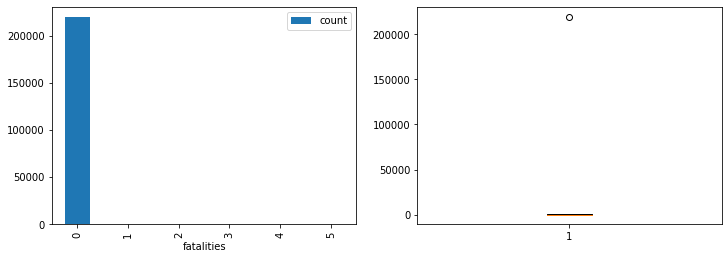

In [26]:
for column in outcome_columns:
    fig = plt.figure(figsize=(12, 4))
    left = fig.add_subplot(1, 2, 1)
    right = fig.add_subplot(1, 2, 2)

    tempdf = df.groupby(df[column]).size().to_frame('count')
    tempdf.plot.bar(ax=left);
    right.boxplot(tempdf['count']);
    fig.show();

It seems that the most common accidents involve:

- 2 people and 2 vehicles
- 0 pedestrians or cyclists
- 0 to 1 injuries
- 0 death

### Side note: What to do with outliers?

- It's important to think if it makes sense to handle outliers or keep them as they are.
- Look at the distribution (e.g., is it normal?) for each column and think whether or not you will be using the column for later analyses (e.g., is there enough variability to explain by other columns?).
- You could consider transforming the data (e.g., log transformation).
- You could replace outliers with the mean or median of the column.

Going back to Q1. how to define dangerousness:

- It might be difficult to use `pedcount`, `pedcylcount`, `seriousinjuries`, and `fatalities` as measures of dangerous locations due to the lack of variability in these columns.
- Let's try using the number of accidents as a way to measure a location's dangerousness

### Q2. Which locations have had the highest total number of accidents?

In [27]:
locdf = df.groupby('location').size().to_frame('count').reset_index()
locdf.sort_values('count', ascending=False, inplace=True)
locdf = locdf.head(7)
locdf

,location,count
11287,battery st tunnel nb between alaskan wy vi nb ...,298
17570,n northgate way between meridian ave n and cor...,295
11288,battery st tunnel sb between aurora ave n and ...,291
11120,aurora ave n between n 117th pl and n 125th st,280
9584,6th ave and james st,271
11124,aurora ave n between n 130th st and n 135th st,269
10818,alaskan wy vi nb between s royal brougham way ...,256


- We need to remember that the heavier the traffic is, the more likely there is to be an accident. 
- So these locations may have the highest numers of accidents, but also may have the highest amounts of overall traffic. 

Above, we defined dangerousness by the **total** number of incidents. Let's try looking into the number of **severe** incidents.

### Q3. Which locations have the highest numbers of severe incidents?

First, let's take a look at the categories of `severitycode`.

In [28]:
# Re-labeling serverity so that the categories are self-explanatory
df['severitycode'] = df['severitycode'].map({'0': 'Unknown', '1': 'Prop_damage', '2': 'Injury',
                                             '2b': 'Serious_injury', '3': 'Fatality'})

df.groupby(['severitycode']).size().to_frame('count')

,count
severitycode,
Fatality,347
Injury,58268
Prop_damage,136663
Serious_injury,3064
Unknown,21440


In [29]:
# Select incidents that involved injuries and deaths 
severity = ['Fatality', 'Serious_injury', 'Injury']
sevdf = df[(df['severitycode'].isin(severity))]
# Groupby the dataframe by location to rank locations by the number of severe incidents
sevcdf = sevdf.groupby('location').size().to_frame('count').reset_index()
sevcdf.sort_values('count', ascending=False, inplace=True)
most_sev = sevcdf.head(7)
most_sev

,location,count
5658,aurora ave n between n 117th pl and n 125th st,126
4723,6th ave and james st,112
10432,rainier ave s between s bayview st and s mccle...,97
5662,aurora ave n between n 130th st and n 135th st,96
9310,n northgate way between meridian ave n and cor...,96
5791,battery st tunnel sb between aurora ave n and ...,93
12585,west seattle br eb between alaskan wy vi nb on...,82


Let's compare the locations with the highest numbers of **severe** incidents and locations with the highest numbers of **total** incidents.

In [30]:
# These are the locations with highest number of severe incidents

mostsevlocations = list(most_sev['location'])
sorted(mostsevlocations, key=str.lower)

['6th ave and james st',
 'aurora ave n between n 117th pl and n 125th st',
 'aurora ave n between n 130th st and n 135th st',
 'battery st tunnel sb between aurora ave n and alaskan wy vi sb',
 'n northgate way between meridian ave n and corliss ave n',
 'rainier ave s between s bayview st and s mcclellan st',
 'west seattle br eb between alaskan wy vi nb on rp and delridge-w seattle br eb on rp']

In [31]:
# These are the locations with highest total number of incidents
manyaccident_locations = list(locdf['location'])
sorted(manyaccident_locations, key=str.lower)

['6th ave and james st',
 'alaskan wy vi nb between s royal brougham way on rp and seneca st off rp',
 'aurora ave n between n 117th pl and n 125th st',
 'aurora ave n between n 130th st and n 135th st',
 'battery st tunnel nb between alaskan wy vi nb and aurora ave n',
 'battery st tunnel sb between aurora ave n and alaskan wy vi sb',
 'n northgate way between meridian ave n and corliss ave n']

- 5 locations appear on both lists
- 2 locations only appear on the list of locations with most severe incidents
- 2 other locations only appear on the list of locations with highest number of incidents
- Looks like there is some overlap between the two lists
- Either the total number of accidents or total number of severe accidents could be an indicator of dangerousness

## Goal 2: identify predictors of accidents

Now let's try to find what contributes to accidents by looking at: 
- External factors
- People factors
- Characteristics of the collision site

### External factors

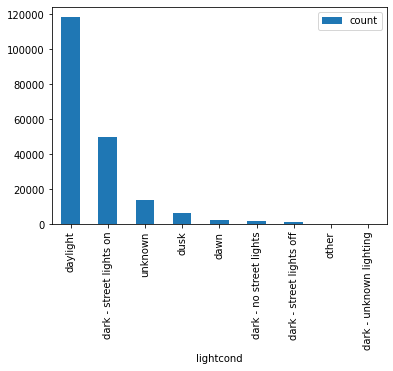

In [32]:
df.groupby('lightcond').size().to_frame('count').sort_values(by=['count'], ascending=False).plot.bar()

There are a lot of subcategories for `dark` conditions. Let's try combining them.

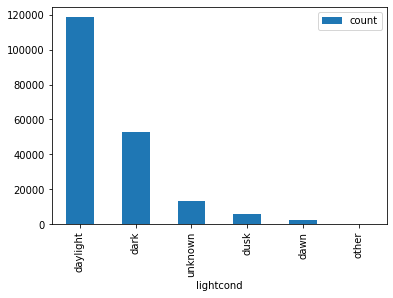

In [33]:
df['lightcond'] = df['lightcond'].replace({
   'dark - no street lights': 'dark',
   'dark - street lights off': 'dark',
   'dark - street lights on': 'dark',
   'dark - unknown lighting': 'dark'})

df.groupby('lightcond').size().to_frame('count').sort_values(by=['count'], ascending=False).plot.bar()

**Exercise**
Check the frequencies for `wheather`

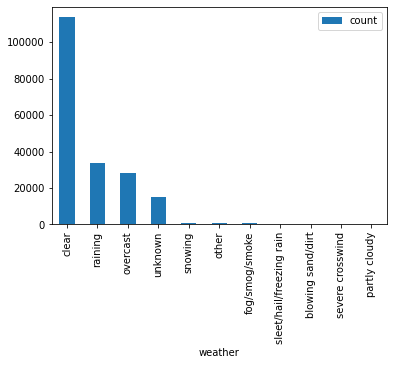

In [34]:
df.groupby('weather').size().to_frame('count').sort_values(by=['count'], ascending=False).plot.bar()

**End of exercise**

- Most incidents happened in daylight and a clear weather. 
- Is a bad weather not a predictor of accidents then?

### People factors

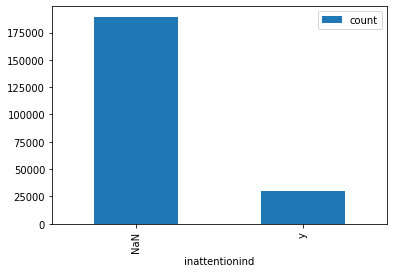

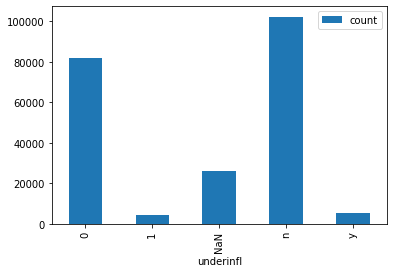

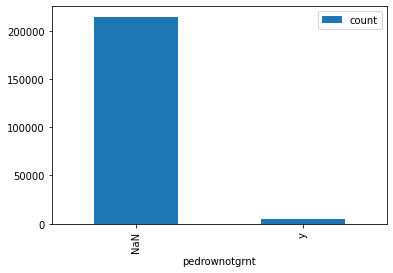

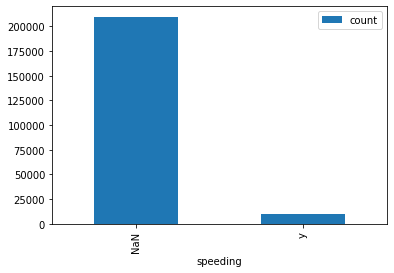

In [35]:
people_factors = ['inattentionind', 'underinfl', 'pedrownotgrnt', 'speeding']
for factor in people_factors:
    display(df.fillna('NaN').groupby(factor).size().to_frame('count').plot.bar())

- As you can see, there are a lot of missing data in these columns. This is something important to keep in mind when we conduct an analysis later. 
- There are fewer missing values for `underinfl` (whether the driver was under the influence) but there are `0`s and `1`s vs. `n`s and `y`s. If we want to use this column for an analysis later, we should combine these categories, assuming that `0`s = `n`s and `1`s = `y`s.
- Under this assumption, in most cases, drivers were NOT under the influence

### Characteristics of the collision site

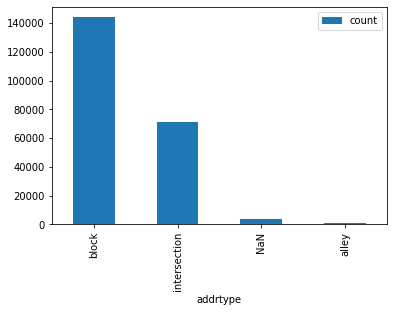

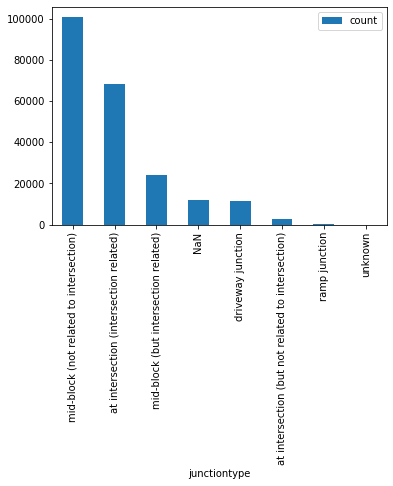

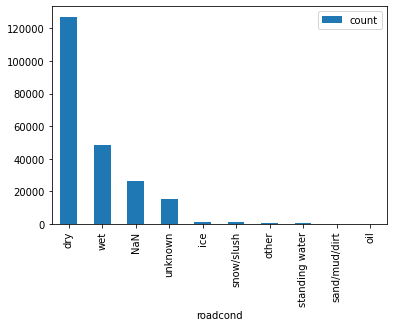

In [36]:
site_characteristics = ['addrtype', 'junctiontype', 'roadcond']
for characteristic in site_characteristics:
    display(df.fillna('NaN').groupby(characteristic).size().to_frame('count').sort_values(by=['count'], ascending=False).plot.bar())

More than half of the incidents happened on
- a block rather than an intersection
- a dry road

So far, we found that many incidents happened
- in daylight
- in a clear weather
- on a block
- on a dry road

Given these findings, can we rule out darkness and bad weather as predictors of accidents??

### Q3. Can we predict severity from junction type?

Note: SEVERITYCODE and SEVERITYDESC have the same information

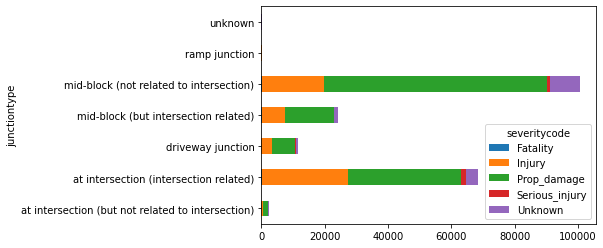

In [37]:
df.pivot_table(index='junctiontype', columns='severitycode', aggfunc='size').plot.barh(stacked=True)

## Goal 3: Examine increase or decrease in number of accidents over time

So far, we've looked at the dataset without considering the longitudinal aspect of it. Let's take a look at the change over time in the number of accidents.

### Q4. Has the number of accidents increased or decreased over time?

Let's first take a look at the general trend over time in the overall number of accidents

In [38]:
yeardf = df.groupby('year').year.size().to_frame('count').reset_index()
yeardf["year"] = yeardf["year"].astype(int)
yeardf.head(20)

,year,count
0,2004,15457
1,2005,16016
2,2006,15794
3,2007,15082
4,2008,14139
5,2009,13275
6,2010,11958
7,2011,12416
8,2012,12732
9,2013,12757


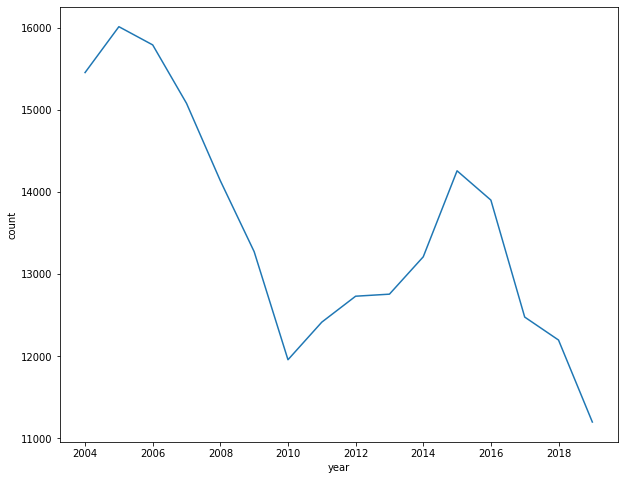

In [39]:
yeardf = yeardf[(yeardf['year'] < 2020)]# Excluding 2020 because the data is incomplete 
fig = plt.figure(figsize=(10, 8));
sns.lineplot(x="year", y="count", data=yeardf);

- It looks like there was a decline from 2004 to 2010, then an increase to 2015, then a decline again toward 2019.
- What might have contributed to these declines and increase in accidents? Change in the volume of traffic? Did the City make changes to the location?

Would we see a similar pattern for the dangerous locations we have identified earlier? Let's take alook. 

### Q5. How has the number of incidents changed over time for the most dangerous locations?

In [40]:
manyaccident_df = df[df['location'].isin(locdf['location'])]
manyaccident_df.head()

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar,year,month
36,NaN,NaN,37,19800,19800,1060128,matched,block,NaN,alaskan wy vi nb between s royal brougham way ...,NaN,NaN,Prop_damage,property damage only collision,other,1,0,0,1,0,0,0,2004-12-23,2004-12-23 00:20:00,mid-block (not related to intersection),28.0,motor vehicle ran off road - hit fixed object,NaN,1,clear,dry,dark,NaN,4358043.0,NaN,50,fixed object,0,0,n,2004,12
60,-122.344997,47.725036,61,25200,25200,1793826,matched,block,NaN,aurora ave n between n 130th st and n 135th st,NaN,NaN,Prop_damage,property damage only collision,sideswipe,2,0,0,2,0,0,0,2004-07-27,2004-07-27 16:51:00,mid-block (not related to intersection),16.0,"motor vehicle struck motor vehicle, left side ...",NaN,0,clear,dry,daylight,NaN,4209036.0,NaN,12,from same direction - both going straight - on...,0,0,n,2004,07
103,-122.344896,47.717173,104,1053,1053,3501458,matched,block,NaN,aurora ave n between n 117th pl and n 125th st,,NaN,Prop_damage,property damage only collision,left turn,2,0,0,2,0,0,0,2013-03-26,2013-03-26 16:41:00,driveway junction,11.0,"motor vehicle struck motor vehicle, front end ...",y,n,clear,dry,daylight,NaN,NaN,NaN,28,from opposite direction - one left turn - one ...,0,0,n,2013,03
229,-122.344896,47.717173,230,18700,18700,1079621,matched,block,NaN,aurora ave n between n 117th pl and n 125th st,NaN,NaN,Prop_damage,property damage only collision,other,4,0,0,2,0,0,0,2004-10-04,2004-10-04 00:00:00,driveway junction,11.0,"motor vehicle struck motor vehicle, front end ...",NaN,0,clear,dry,daylight,NaN,4278029.0,NaN,21,one car entering driveway access,0,0,n,2004,10
417,NaN,NaN,418,111500,111500,3346098,matched,block,NaN,battery st tunnel nb between alaskan wy vi nb ...,NaN,NaN,Prop_damage,property damage only collision,other,1,0,0,1,0,0,0,2010-10-23,2010-10-23 18:01:00,mid-block (not related to intersection),26.0,motor vehicle struck object in road,NaN,n,raining,wet,dark,NaN,10296042.0,NaN,50,fixed object,0,0,n,2010,10


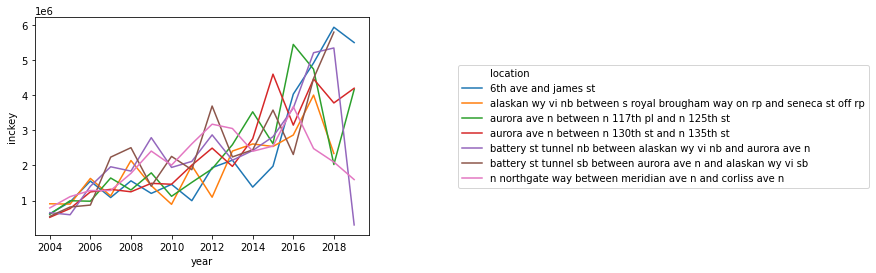

In [41]:
manyaccident_year_data = manyaccident_df.groupby(['location', 'year'])['inckey'].sum().reset_index()
# Let's exclude 2020 since data are still coming in
manyaccident_year_data = manyaccident_year_data[(manyaccident_year_data['year'] < 2020)]
g = sns.lineplot(x="year", y="inckey", hue="location", data=manyaccident_year_data)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

- In general, there is an upward trend toward 2018
- But a few locations (e.g., blue, purple, and pink) show a decline toward/around 2018
- Green line is going up after 2018
- What might explain these different patterns in different locations?

## 9. Understand relationships between columns


## a. Scatter plots

## b. Bar graphs

## c. Correlations between variables

In [42]:
df.corr()

,x,y,objectid,inckey,coldetkey,intkey,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,sdot_colcode,sdotcolnum,seglanekey,crosswalkkey,year
x,1.000000,-0.156870,0.006097,0.005974,0.005971,0.118968,0.019297,0.012184,-0.001617,0.005715,0.014716,-0.005209,0.000512,0.018278,-0.004937,-0.000422,0.013911,0.006010
y,-0.156870,1.000000,-0.021209,-0.024275,-0.024291,-0.114157,-0.029718,0.008646,0.023371,-0.016361,0.001787,-0.002374,-0.004600,-0.026091,-0.007234,0.003643,0.007005,-0.023129
objectid,0.006097,-0.021209,1.000000,0.946298,0.945750,0.046665,-0.066049,0.022177,0.028332,-0.103238,-0.005827,-0.004250,-0.001852,-0.085247,0.970435,0.024506,0.052654,0.957430
inckey,0.005974,-0.024275,0.946298,1.000000,0.999996,0.048242,-0.066847,0.022433,0.024927,-0.113732,-0.005392,-0.004071,0.000198,-0.075677,0.990963,0.015970,0.044510,0.974854
coldetkey,0.005971,-0.024291,0.945750,0.999996,1.000000,0.048221,-0.066780,0.022434,0.024884,-0.113789,-0.005386,-0.004056,0.000207,-0.075503,0.990963,0.015857,0.044391,0.974404
intkey,0.118968,-0.114157,0.046665,0.048242,0.048221,1.000000,0.005021,-0.001154,-0.000077,-0.005857,0.012299,0.010428,0.013781,0.006969,0.031020,-0.009804,0.019959,0.049643
personcount,0.019297,-0.029718,-0.066049,-0.066847,-0.066780,0.005021,1.000000,0.011393,-0.009413,0.558034,0.319277,0.107682,0.046406,0.008607,0.010687,-0.008452,-0.010482,-0.066853
pedcount,0.012184,0.008646,0.022177,0.022433,0.022434,-0.001154,0.011393,1.000000,-0.015869,-0.155148,0.167390,0.132441,0.073218,0.261012,0.021195,0.001275,0.553713,0.021945
pedcylcount,-0.001617,0.023371,0.028332,0.024927,0.024884,-0.000077,-0.009413,-0.015869,1.000000,-0.151474,0.122465,0.061832,0.011112,0.369043,0.031468,0.456361,0.104026,0.027936
vehcount,0.005715,-0.016361,-0.103238,-0.113732,-0.113789,-0.005857,0.558034,-0.155148,-0.151474,1.000000,0.142788,-0.003102,-0.010611,-0.078438,-0.016652,-0.076085,-0.121884,-0.106924


## d. Statistical significance

To be done

## e. Simple feature engineering??

Maybe this was already covered... 
